## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [20]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [21]:
train, test = keras.datasets.cifar10.load_data()

In [22]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [23]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [24]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [25]:

## hyper params setting
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
is_save_best_only = [True, False]

In [26]:
from keras.callbacks import ModelCheckpoint

results = {}

for save_best_only in is_save_best_only:
    model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=save_best_only)

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[model_ckpt]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    tag = f'exp_save_best_only_{save_best_only}'
        
    results[tag] = {'train-loss': train_loss,
                   'valid-loss': valid_loss,
                   'train-acc': train_acc,
                   'valid-acc': valid_acc}

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512 

Epoch 46/50
50000/50000 [==============================] - 10s 204us/step - loss: 0.5671 - accuracy: 0.8325 - val_loss: 1.6584 - val_accuracy: 0.4826
Epoch 47/50
50000/50000 [==============================] - 10s 190us/step - loss: 0.5503 - accuracy: 0.8393 - val_loss: 1.6641 - val_accuracy: 0.4837
Epoch 48/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.5356 - accuracy: 0.8445 - val_loss: 1.6673 - val_accuracy: 0.4838
Epoch 49/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.5198 - accuracy: 0.8512 - val_loss: 1.6841 - val_accuracy: 0.4889
Epoch 50/50
50000/50000 [==============================] - 10s 202us/step - loss: 0.5027 - accuracy: 0.8567 - val_loss: 1.7357 - val_accuracy: 0.4712
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
___________________________________

Epoch 41/50
50000/50000 [==============================] - 10s 198us/step - loss: 0.6626 - accuracy: 0.7950 - val_loss: 1.5599 - val_accuracy: 0.4925
Epoch 42/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.6456 - accuracy: 0.8006 - val_loss: 1.5606 - val_accuracy: 0.4973
Epoch 43/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.6265 - accuracy: 0.8115 - val_loss: 1.5775 - val_accuracy: 0.4937
Epoch 44/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.6098 - accuracy: 0.8175 - val_loss: 1.5728 - val_accuracy: 0.4947
Epoch 45/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.5931 - accuracy: 0.8234 - val_loss: 1.6060 - val_accuracy: 0.4880
Epoch 46/50
50000/50000 [==============================] - 10s 194us/step - loss: 0.5739 - accuracy: 0.8307 - val_loss: 1.5947 - val_accuracy: 0.5003
Epoch 47/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.5585 - accuracy:

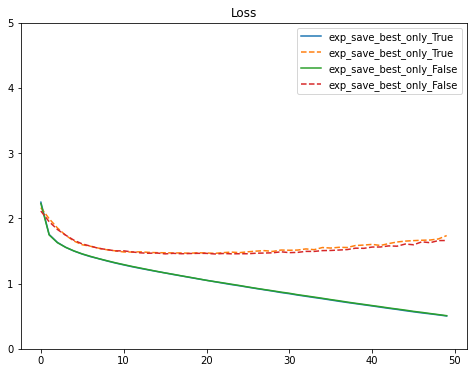

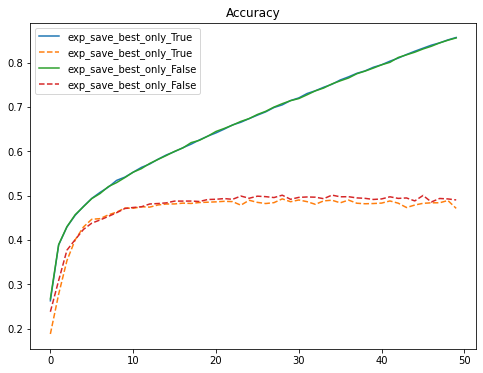

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()

In [28]:
model_ckpt = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_weights_only=True)

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[model_ckpt]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_21 (Batc (None, 128)               512 

Epoch 46/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.5796 - accuracy: 0.8278 - val_loss: 1.6179 - val_accuracy: 0.4916
Epoch 47/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.5612 - accuracy: 0.8349 - val_loss: 1.6440 - val_accuracy: 0.4882
Epoch 48/50
50000/50000 [==============================] - 10s 196us/step - loss: 0.5455 - accuracy: 0.8409 - val_loss: 1.6467 - val_accuracy: 0.4928
Epoch 49/50
50000/50000 [==============================] - 10s 195us/step - loss: 0.5294 - accuracy: 0.8496 - val_loss: 1.6492 - val_accuracy: 0.4931
Epoch 50/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.5115 - accuracy: 0.8563 - val_loss: 1.7043 - val_accuracy: 0.4795


In [29]:
# Load back
model = build_mlp(input_shape=x_train.shape[1:])
model.load_weights("./tmp.h5")
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 144us/step


In [30]:
print('Load Back')
print(f'loss_loadback: {loss_loadback}')
print(f'acc_loadback: {acc_loadback}')

print('Original Model')
print(f'valid_loss: {min(valid_loss)}')
print(f'valid_acc: {min(valid_acc)}')

Load Back
loss_loadback: 1.704335705757141
acc_loadback: 0.4794999957084656
Original Model
valid_loss: 1.4405104513168334
valid_acc: 0.16019999980926514
